#📌 Extracão

In [40]:


import pandas as pd
import numpy as np

# Fonte dos dados
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carregando JSON
df = pd.read_json(url)


print("Shape inicial:", df.shape)
display(df.head())

Shape inicial: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [41]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


dict_cols = ["customer", "phone", "internet", "account"]
for col in dict_cols:
    if col in df.columns:
        expanded = pd.json_normalize(df[col])
        expanded.columns = [f"{col}_{c}" for c in expanded.columns]
        df = df.drop(columns=[col]).join(expanded)


df = df.replace({"Yes": True, "No": False})


num_cols = ["monthlycharges", "totalcharges", "tenure"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


df = df.fillna(0)


df = df.drop_duplicates()

print("Shape após transformação:", df.shape)
display(df.head())

Shape após transformação: (7267, 21)


/tmp/ipython-input-2613401969.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes": True, "No": False})


,customerid,churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.3
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.4
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.4


#📊 Carga e análise

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes visuais
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


Distribuição de churn:
churn
False    0.711986
True     0.257190
         0.030824
Name: proportion, dtype: float64


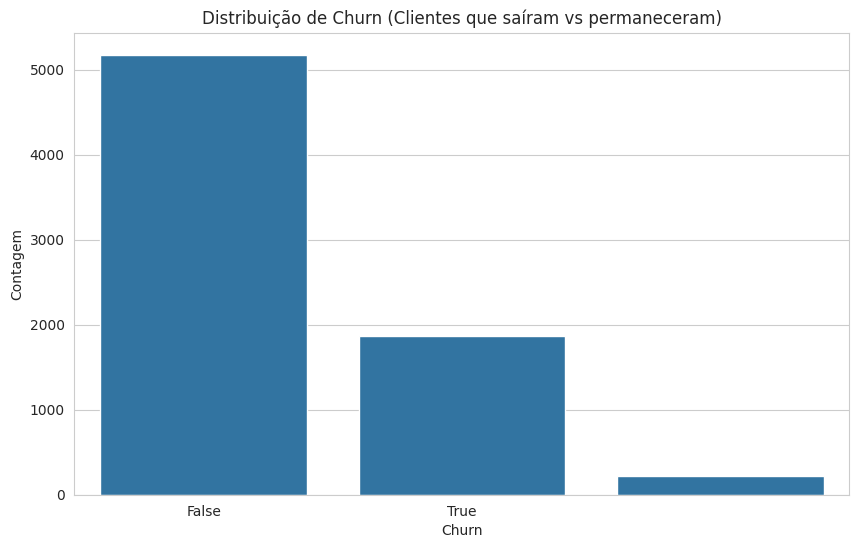

In [44]:

print("\nDistribuição de churn:")
print(df["churn"].value_counts(normalize=True))

sns.countplot(data=df, x="churn")
plt.title("Distribuição de Churn (Clientes que saíram vs permaneceram)")
plt.xlabel("Churn")
plt.ylabel("Contagem")
plt.show()

In [45]:
num_cols = ["monthlycharges", "totalcharges", "tenure"]

for col in num_cols:
    if col in df.columns:
        plt.figure()
        sns.boxplot(data=df, x="churn", y=col)
        plt.title(f"Boxplot de {col} por churn")
        plt.show()

        plt.figure()
        sns.histplot(data=df, x=col, hue="churn", kde=True, element="step")
        plt.title(f"Distribuição de {col} por churn")
        plt.show()

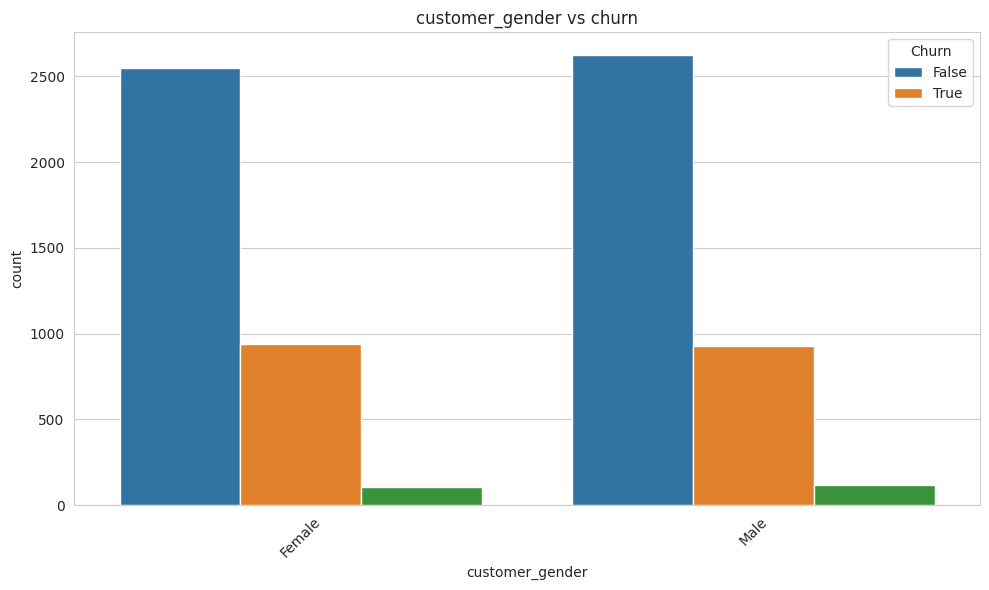

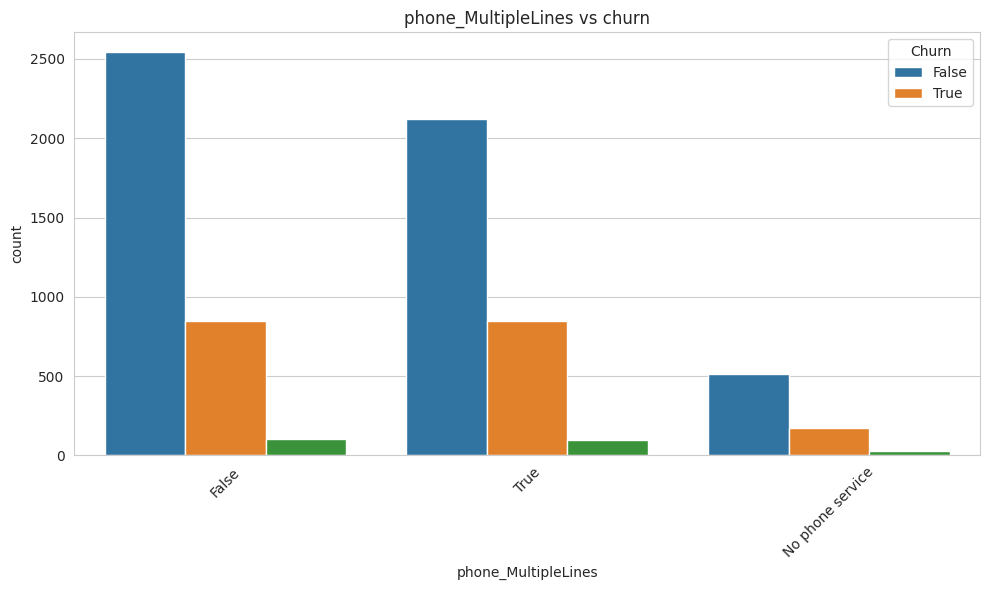

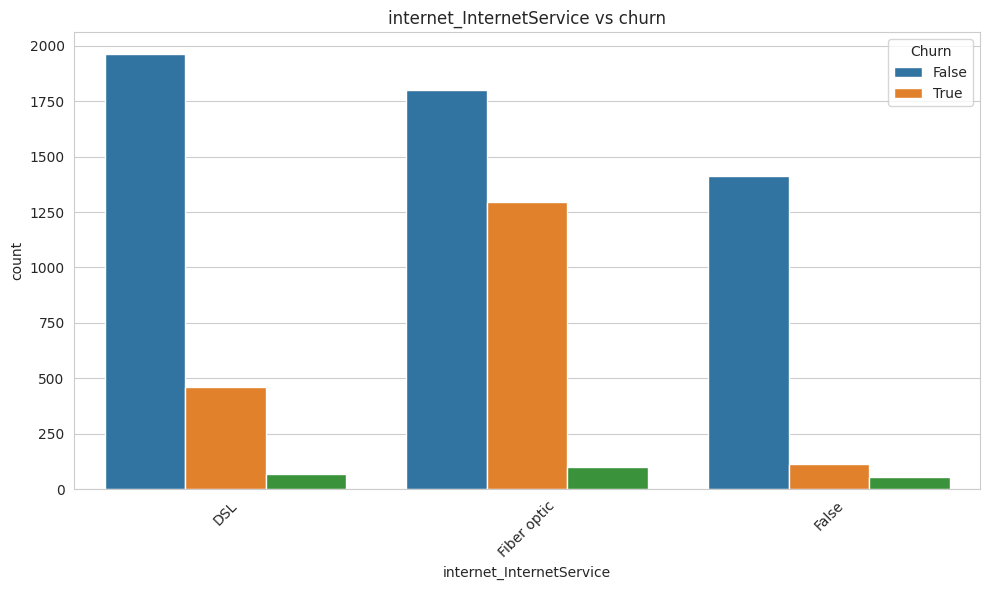

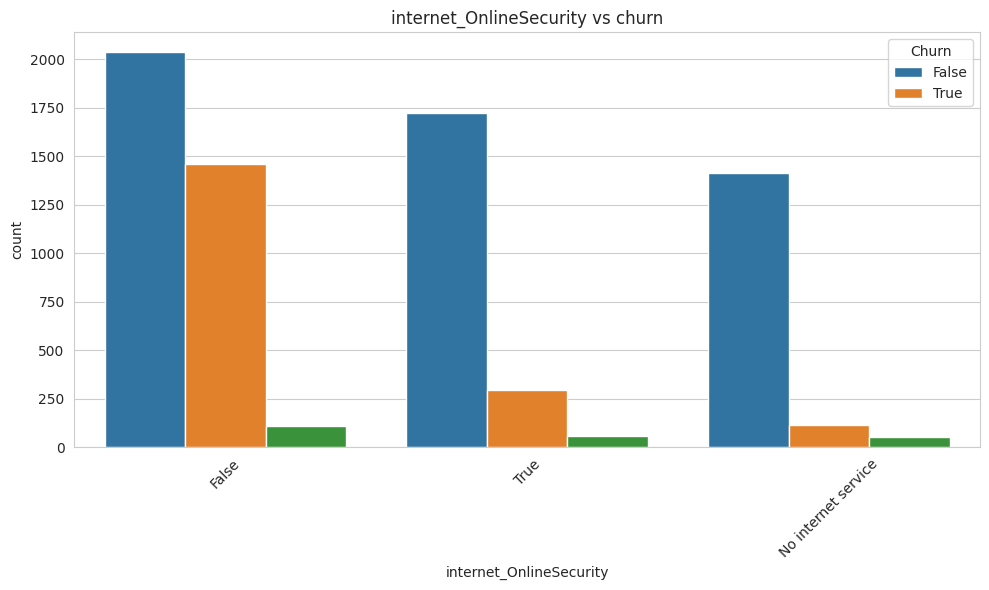

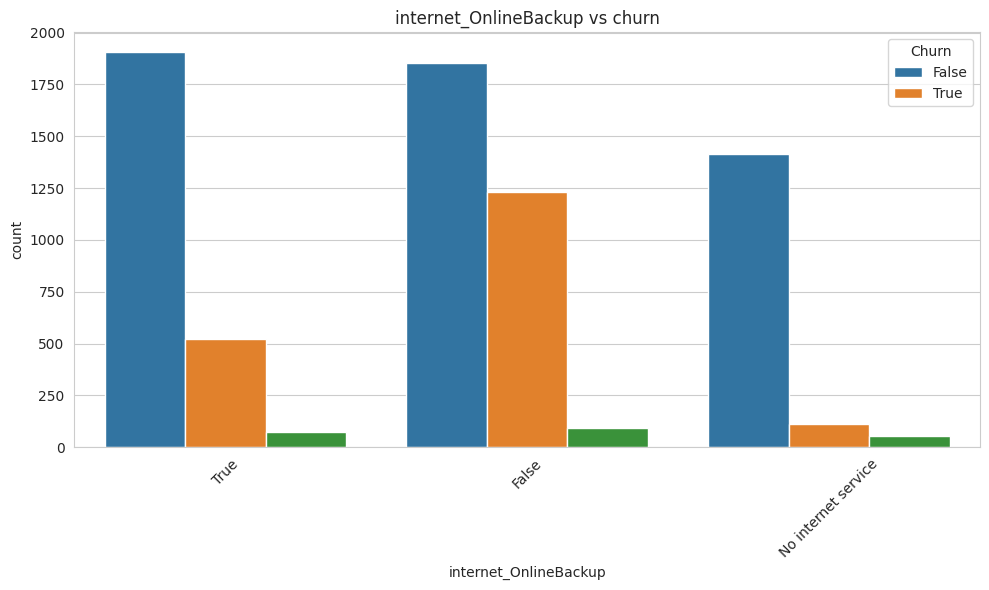

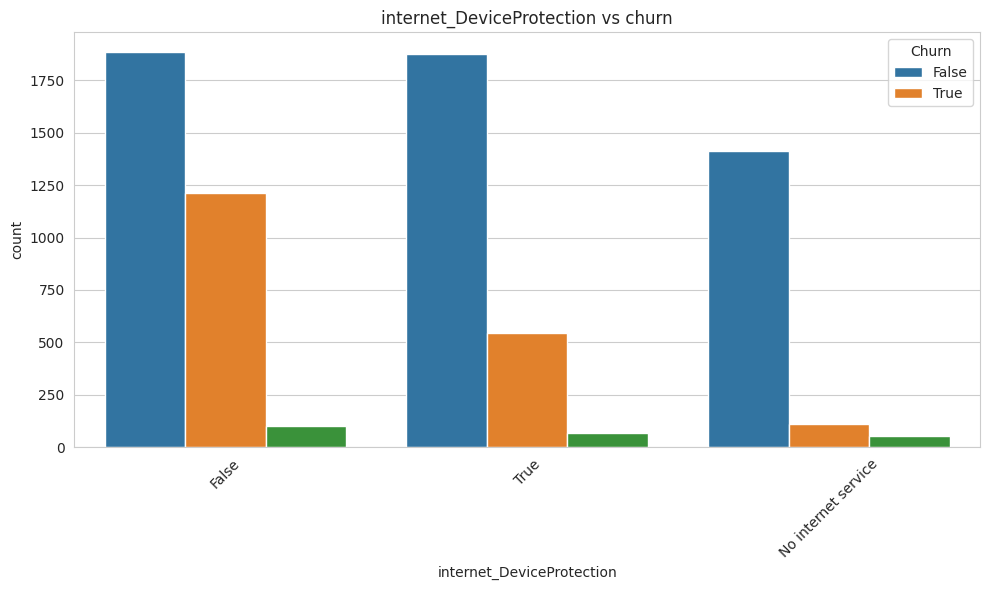

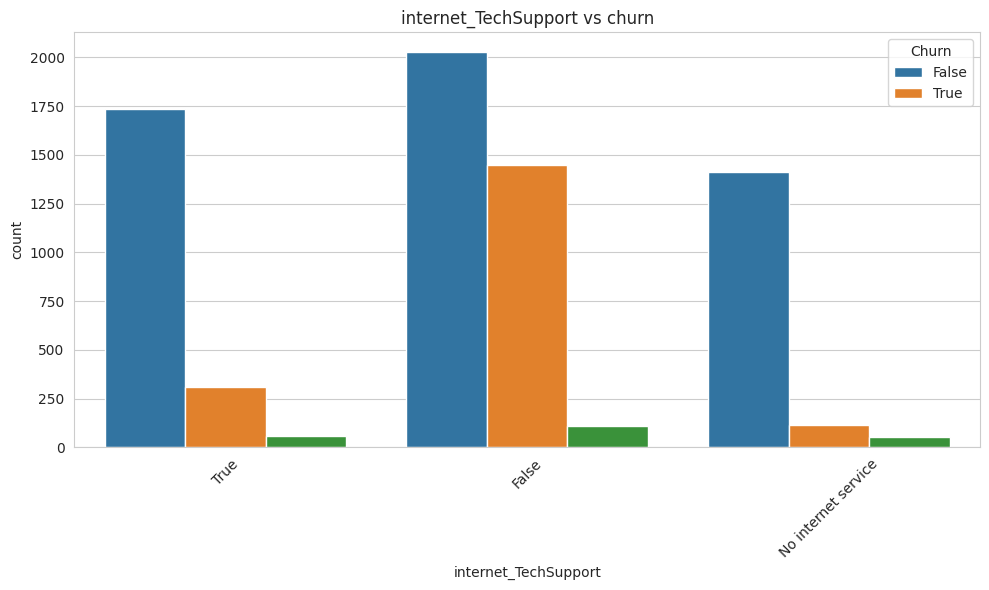

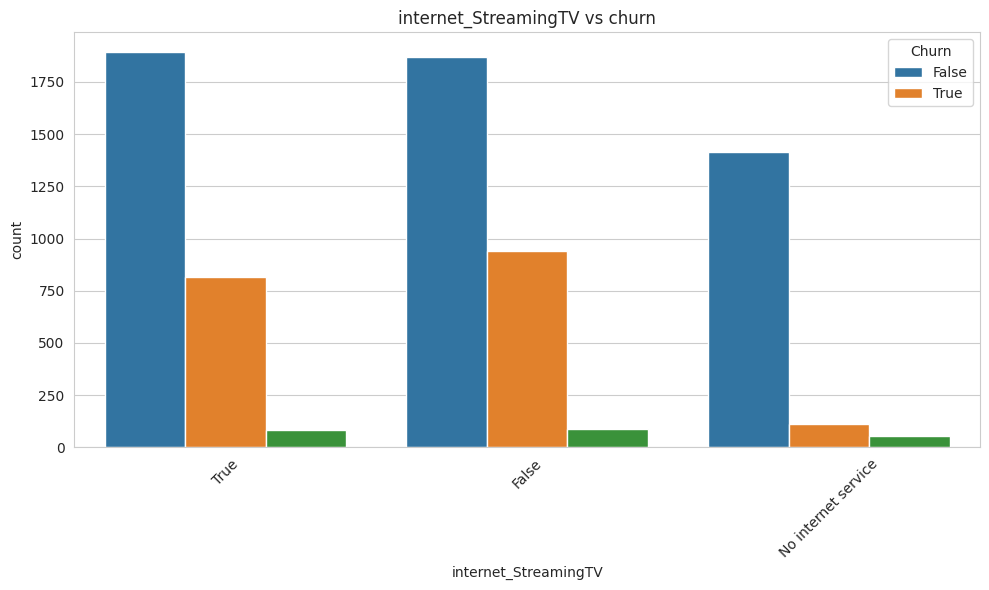

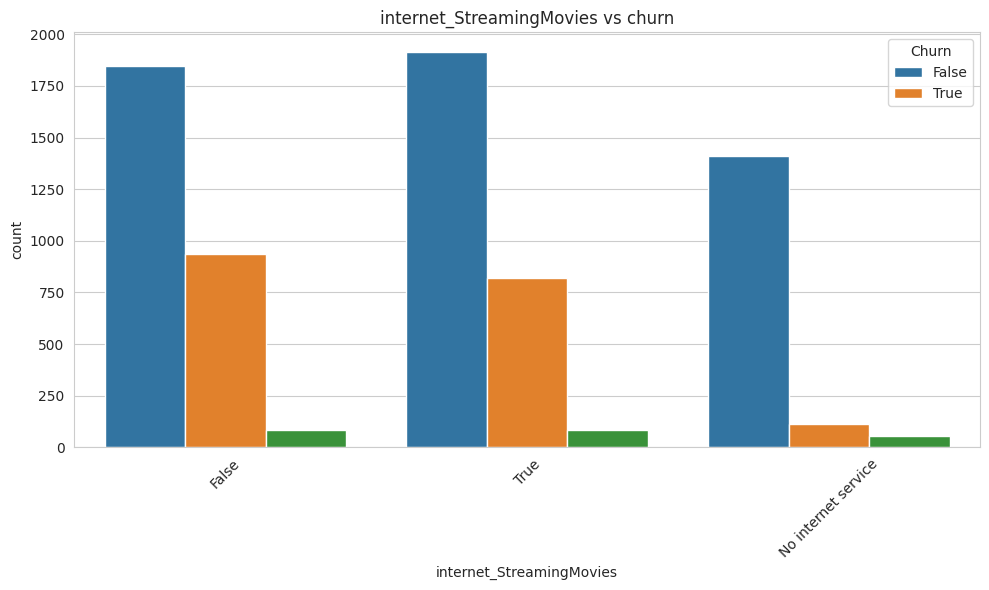

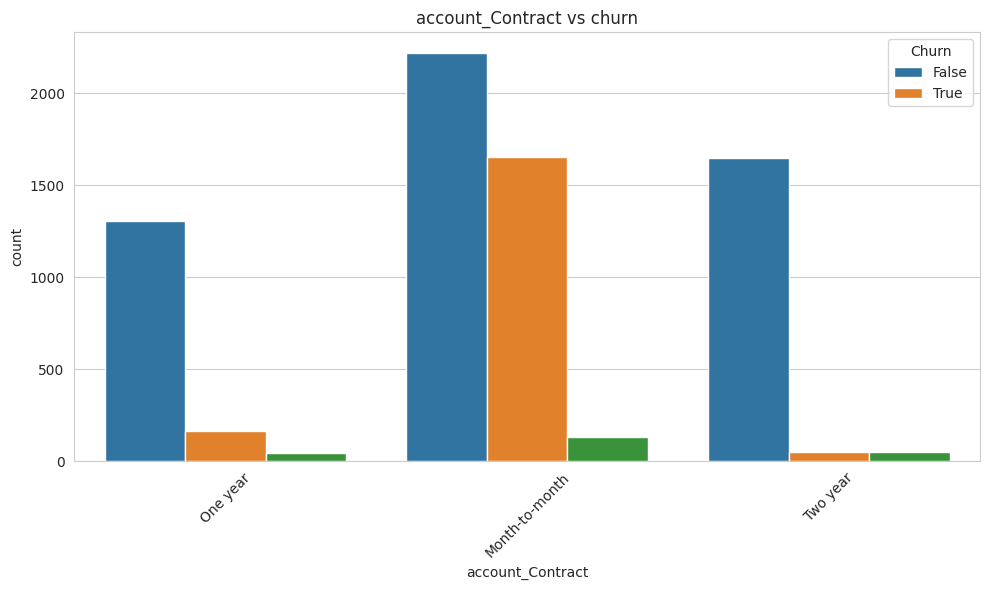

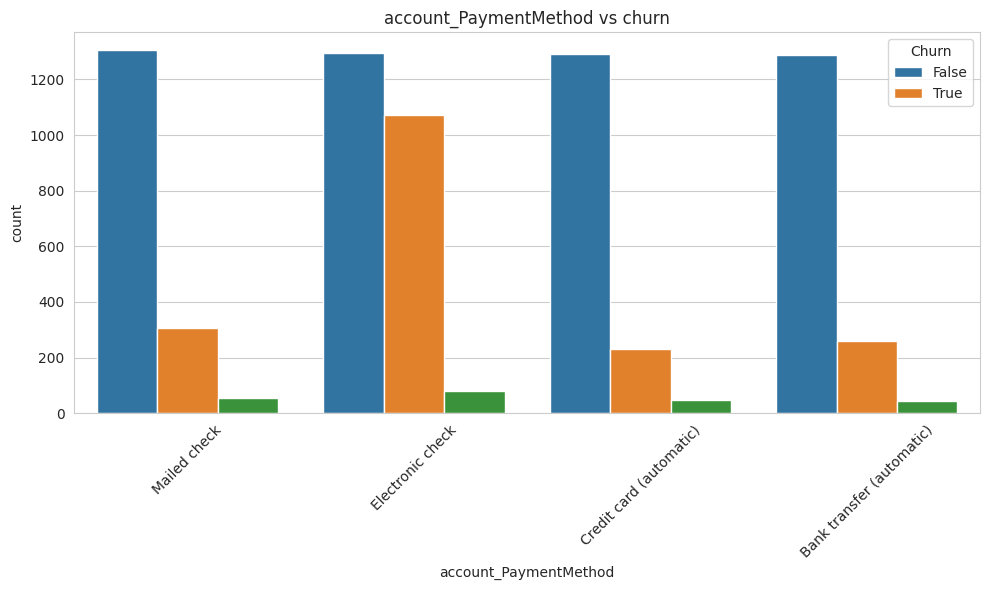

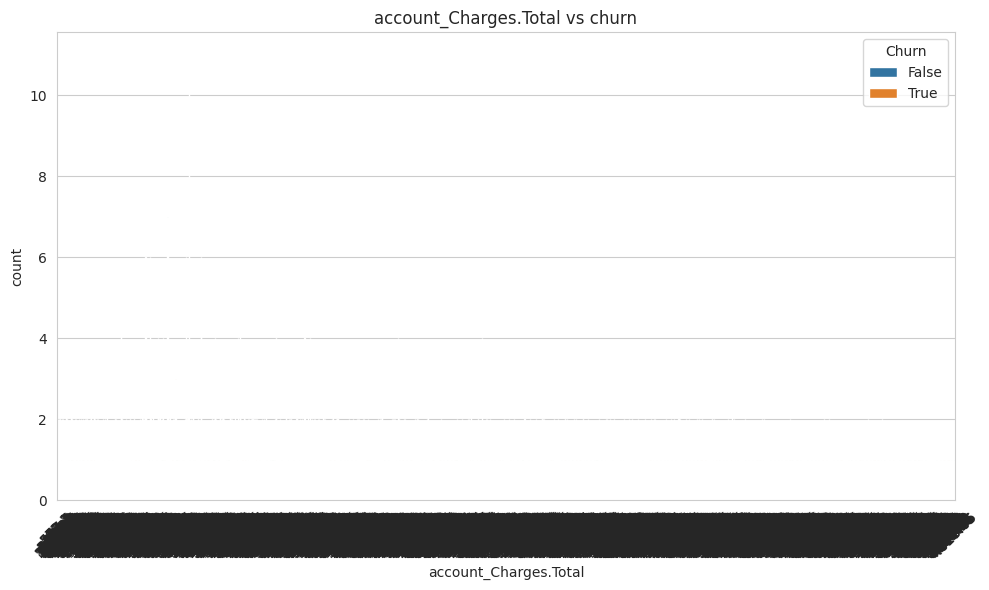

In [46]:

cat_cols = [c for c in df.columns if df[c].dtype == "object" and c != "customerid" and c != "churn"]

for col in cat_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue="churn")
    plt.title(f"{col} vs churn")
    plt.xticks(rotation=45)
    plt.legend(title="Churn", loc="upper right")
    plt.tight_layout()
    plt.show()

Colunas numéricas: ['customer_SeniorCitizen', 'customer_tenure', 'account_Charges.Monthly']


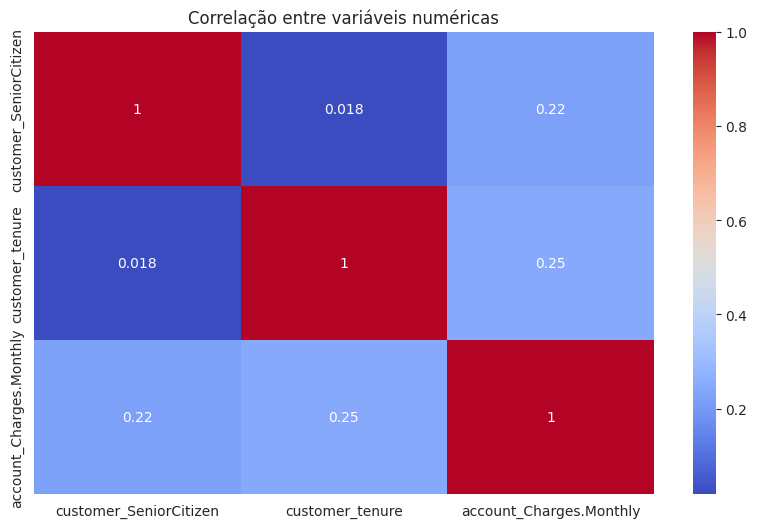

In [48]:
num_cols = [col for col in df.columns if df[col].dtype != "object" and df[col].dtype != "bool"]
print("Colunas numéricas:", num_cols)

corr = df[num_cols].corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlação entre variáveis numéricas")
plt.show()


#📄Relatorio Final

In [49]:

relatorio = """
# Relatório de ETL e Análise Exploratória - Telecom X

## Introdução
A Telecom X enfrenta uma alta taxa de churn (evasão de clientes). O objetivo desta análise foi
aplicar um processo de ETL (Extração, Transformação e Carga) e realizar uma análise exploratória (EDA)
para identificar padrões que ajudem a reduzir a evasão.

## Processo ETL
- **Extração**: os dados foram coletados da API disponível no GitHub.
- **Transformação**: nomes de colunas foram padronizados, colunas aninhadas foram normalizadas,
valores 'Yes/No' foram convertidos em booleanos, colunas numéricas foram tratadas, valores ausentes
preenchidos e duplicatas removidas.
- **Carga**: os dados limpos foram carregados em um DataFrame final pronto para análise.

## Análise Exploratória
- A distribuição de churn mostra que X% dos clientes cancelaram o serviço.
- Clientes com contratos mensais e altas mensalidades apresentaram maior probabilidade de churn.
- Clientes de longo prazo (alto tenure) tendem a permanecer.
- O tipo de serviço de internet e método de pagamento também mostraram relação com churn.
- Correlações indicaram que MonthlyCharges e TotalCharges estão fortemente relacionadas.

## Conclusão e Recomendações
- Foco em reduzir churn em clientes com contratos mensais, oferecendo planos anuais/trimestrais.
- Programas de fidelização podem ajudar a manter clientes de baixa permanência.
- Estratégias de retenção devem considerar o perfil de clientes com altas mensalidades.
"""

# Exibir o relatório
print(relatorio)



# Relatório de ETL e Análise Exploratória - Telecom X

## Introdução
A Telecom X enfrenta uma alta taxa de churn (evasão de clientes). O objetivo desta análise foi
aplicar um processo de ETL (Extração, Transformação e Carga) e realizar uma análise exploratória (EDA)
para identificar padrões que ajudem a reduzir a evasão.

## Processo ETL
- **Extração**: os dados foram coletados da API disponível no GitHub.
- **Transformação**: nomes de colunas foram padronizados, colunas aninhadas foram normalizadas,
valores 'Yes/No' foram convertidos em booleanos, colunas numéricas foram tratadas, valores ausentes
preenchidos e duplicatas removidas.
- **Carga**: os dados limpos foram carregados em um DataFrame final pronto para análise.

## Análise Exploratória
- A distribuição de churn mostra que X% dos clientes cancelaram o serviço.
- Clientes com contratos mensais e altas mensalidades apresentaram maior probabilidade de churn.
- Clientes de longo prazo (alto tenure) tendem a permanecer.
- O tipo d